In [115]:
df <- read.delim('../Materials/Binomial_prep.csv', sep=',', header=TRUE)

In [116]:
#Two new binary columns whether a production is Dutch (True/False) or German (True/False)
df$Dutch <- as.integer(as.logical(df$Dutch))
df$German <- as.integer(as.logical(df$German))
df$Multiple.bill <- as.integer(as.logical(df$Multiple.bill)) 
colnames(df)[1] <- "Collection"
head(df)

Collection,Date,Original.premiere,genre,Directors,Normalised.title,Composer,Multiple.bill,Season,Occasion,Dutch,German
1893-1897,1893-10-03,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,1893-1894,N,0,1
1893-1897,1893-10-05,1971,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,1893-1894,N,0,1
1893-1897,1893-10-10,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,1893-1894,N,0,1
1893-1897,1893-10-12,1971,romantische oper,Edward Keurvels & Henry Fontaine,Willem Tell,Carl Reinecke,0,1893-1894,N,0,1
1893-1897,1893-11-16,?,lyrisch drama,Edward Keurvels & Henry Fontaine,Charlotte Corday,Peter Benoit,0,1893-1894,N,1,0
1893-1897,1893-10-17,1821,romantische oper,Edward Keurvels & Henry Fontaine,De Vrijschutter,Carl Maria von Weber,0,1893-1894,N,0,1


In [141]:
#Make sure that columns are interpreted as factors

df$Collection <- factor(df$Collection, ordered = TRUE)
df$Season <- factor(df$Season, ordered = TRUE)
df$Composer <- as.factor(df$Composer)
df$Normalised.title <- as.factor(df$Normalised.title)
df$Original.premiere <- as.factor(df$Original.premiere)
df$Genre <- as.factor(df$genre)
df$Occasion <- as.factor(df$Occasion)
df$Directors <- factor(df$Directors, ordered = TRUE)

tail(df)

,Collection,Date,Original.premiere,genre,Directors,Normalised.title,Composer,Multiple.bill,Season,Occasion,Dutch,German,Genre
4436,1933-1934,12/04/1934,1907,leichte oper,Flor Bosmans,Christ'l,Georg Jarno,0,1933-1934,N,0,0,leichte oper
4437,1933-1934,14/04/1934,1882,music drama,Flor Bosmans,Parsifal,Richard Wagner,0,1933-1934,N,0,1,music drama
4438,1933-1934,15/04/1934,1904,opera seria,Flor Bosmans,Madame Butterfly,Giacomo Puccini,0,1933-1934,N,0,0,opera seria
4439,1933-1934,15/04/1934,1916,leichte oper,Flor Bosmans,Driemeisjeshuis,Heinrich BertÃƒÂ©,1,1933-1934,N,0,1,leichte oper
4440,1933-1934,15/04/1934,1932,dramma lirico,Flor Bosmans,Mister Wu,Eugen D'Albert,1,1933-1934,N,0,1,dramma lirico
4441,1933-1934,15/04/1934,1925,operetta,Flor Bosmans,Paganini,Franz LehÃƒÂ¡r,1,1933-1934,N,0,1,operetta


In [128]:
str(df)
#Import relevant libraries
library(lme4)
library(effects) 
library(ggplot2)

'data.frame':	4441 obs. of  13 variables:
 $ Collection       : Ord.factor w/ 31 levels "1893-1897"<"1897-1900"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Date             : Factor w/ 3383 levels "01/01/1901","01/01/1907",..: 1771 1772 1773 1774 1784 1775 1776 1777 1778 1779 ...
 $ Original.premiere: Factor w/ 108 levels "","?","1608",..: 18 106 18 106 2 18 2 18 2 18 ...
 $ genre            : Factor w/ 79 levels "","?","ballet",..: 61 61 61 61 31 61 31 61 31 61 ...
 $ Directors        : Factor w/ 7 levels "Edward Keurvels & Henry Fontaine",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Normalised.title : Factor w/ 328 levels "'T Minnebrugje",..: 111 320 111 320 23 111 23 111 23 111 ...
 $ Composer         : Factor w/ 193 levels "","?","Adolph L'Arronge",..: 36 38 36 38 162 36 162 36 162 36 ...
 $ Multiple.bill    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Season           : Ord.factor w/ 38 levels "1893-1894"<"1894-1895"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Occasion         : Factor w/ 3 levels "G","N","P": 2 2 2 2 2 2 2 2 2 2 

In [129]:
#Model 1 models the expected amount of original Dutch performances across the operatic seasons.
m1 <- glm(Dutch ~ Collection, data = df, family = binomial)
summary(m1)


Call:
glm(formula = Dutch ~ Collection, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6562  -0.7024  -0.4997  -0.2762   2.8267  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.348011   0.045021 -29.942  < 2e-16 ***
Collection.L  -4.527420   0.289186 -15.656  < 2e-16 ***
Collection.Q  -1.490244   0.301211  -4.948 7.52e-07 ***
Collection.C   0.126342   0.302542   0.418 0.676238    
Collection^4  -1.156559   0.303078  -3.816 0.000136 ***
Collection^5   0.711271   0.300888   2.364 0.018083 *  
Collection^6  -1.152526   0.296278  -3.890 0.000100 ***
Collection^7  -0.667128   0.282792  -2.359 0.018320 *  
Collection^8   0.616115   0.258048   2.388 0.016959 *  
Collection^9   0.005475   0.249760   0.022 0.982510    
Collection^10 -0.077343   0.242699  -0.319 0.749971    
Collection^11 -1.014549   0.240097  -4.226 2.38e-05 ***
Collection^12 -0.105361   0.250208  -0.421 0.673686    
Collection^13 -0

In [130]:
4044.9 / 4439 <= 1.4

[1] TRUE

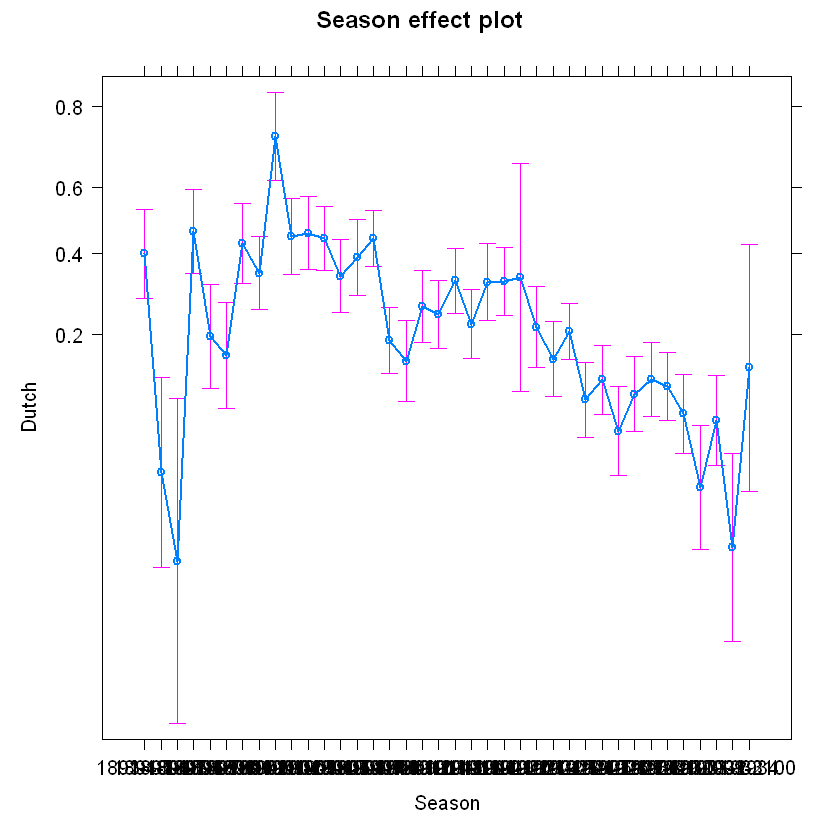

In [142]:
#Decreases over time

m1 <- glm(Dutch ~ Season, data = df, family = binomial)

plot(effect("Season", m1), strip.text.x = element_text(angle = -90))


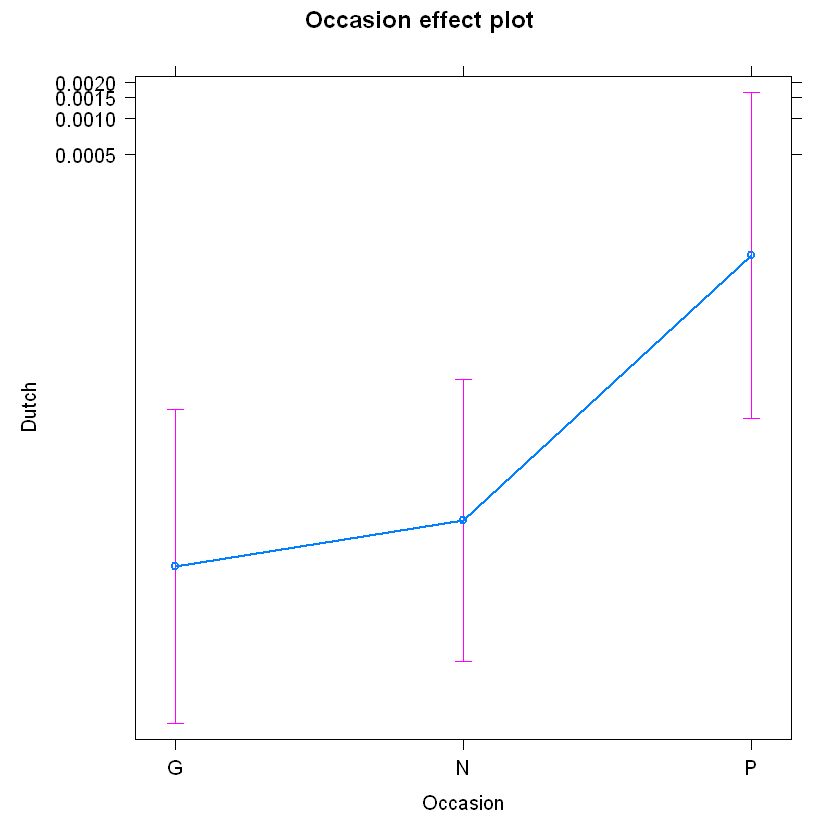

In [133]:
#Model 2: Modelleert het aantal Nederlandstalige opvoeringen met COmposer als een random effect.
model2 <- glmer(Dutch ~ Occasion + (1|Composer), data = df, family = binomial())
plot(effect("Occasion", model2))
#is het logisch om een composer als random effect te gebruiken? Een random effect gaat ervan uit dat de componist een andere baseline heeft
#voor de probability voor het produceren van een Nederlands stuk, maar elke componist in de dataset componeert eigenlijk maar in één taal.
#dus die kans is dus eigenlijk 0 of 1? 

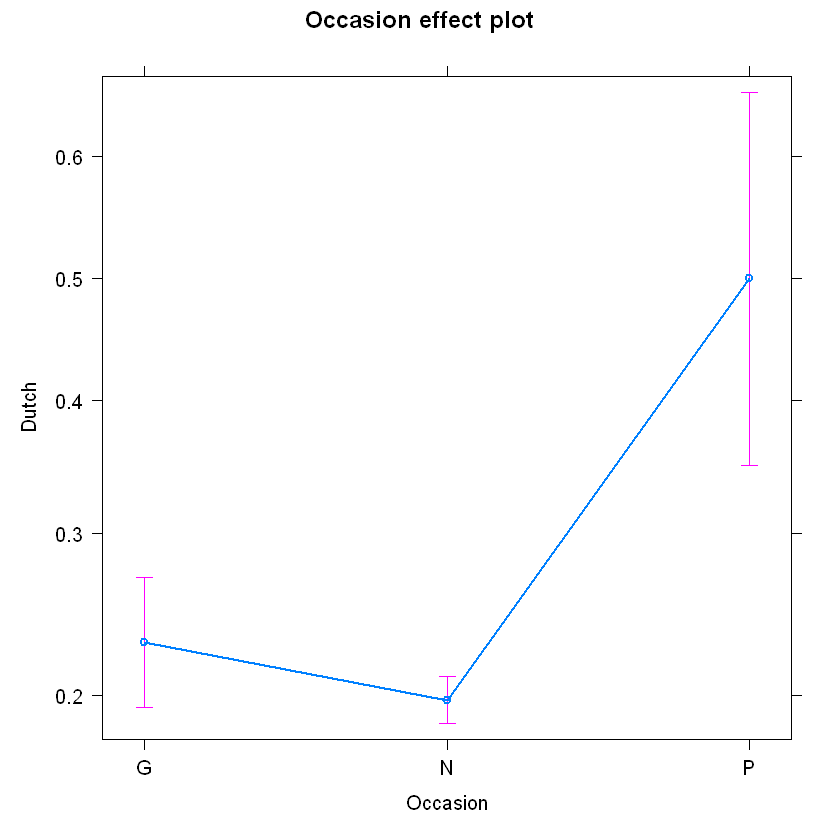

In [134]:
#Model 3: Models the probablity of the type of special occasion given that the production is Dutch

m3 <- glm(Dutch ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", m3))

#Grotere kans dat het een nederlands werk is bij een volksvertoning
#iets grotere kans dat het nederlands is bij een gala vertoning
#minste kans dat het een nederlandse vertoning is bij een 'neutrale' vertoning

#G = gala
#P = popular
#N = neutraal<

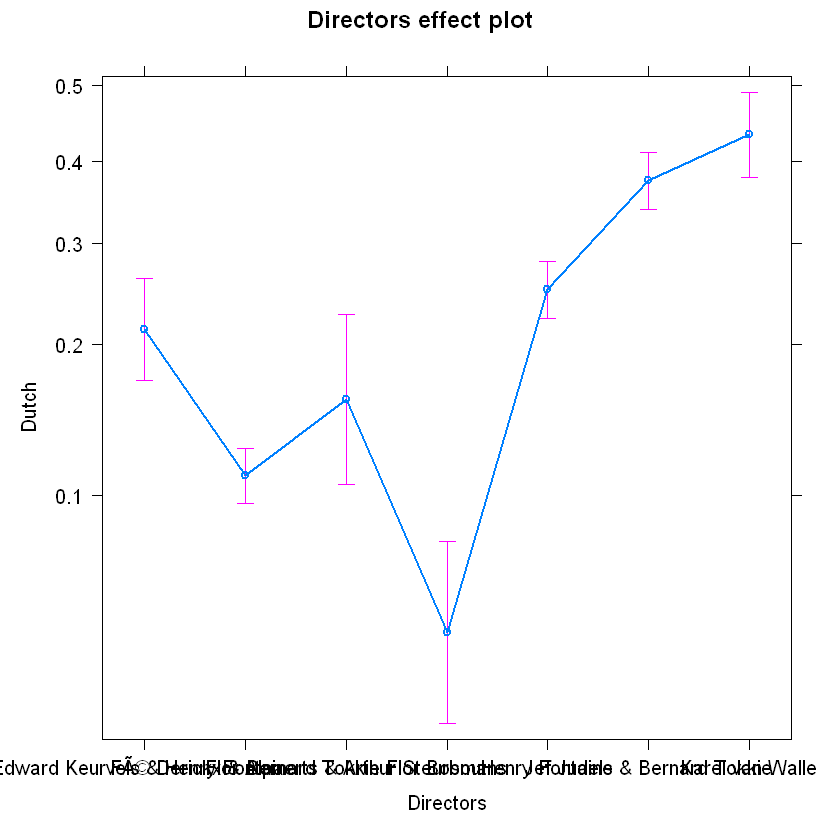

In [138]:
#Model 4: Which director(s) were most probable to produce original Dutch productions.
m4 <- glm(Dutch ~ Directors, data = df, family = binomial)
plot(effect("Directors", m7))



## We try the same but this time with German productions

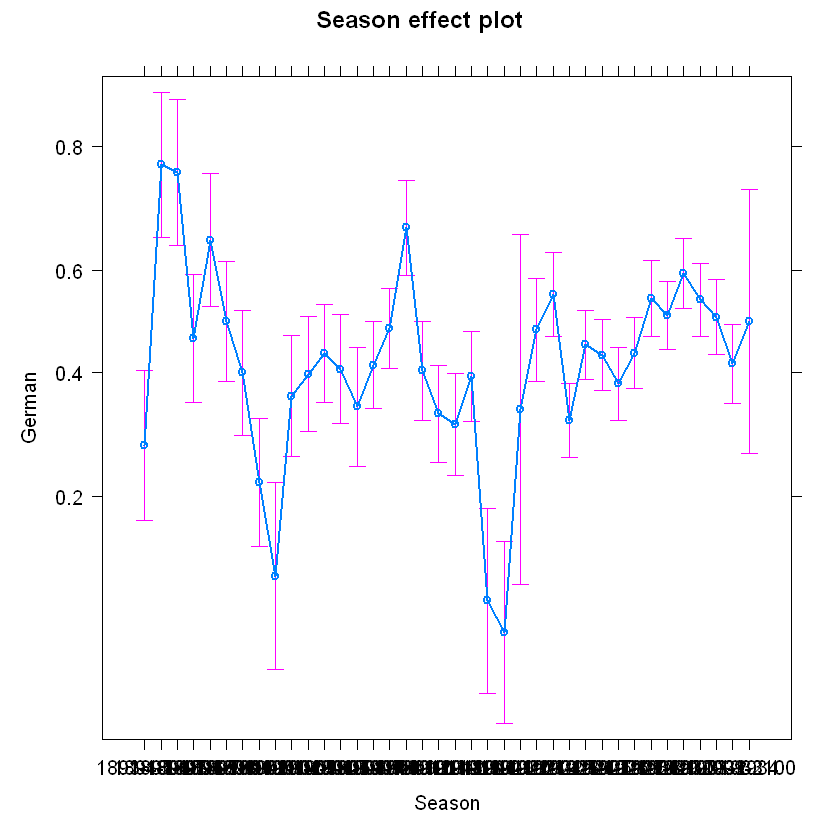

In [144]:
#Model 5: the effect of the Collection on the probability of the outcome "German"
m5_german <- glm(German ~ Season, data = df, family = binomial)

plot(effect("Season", m5_german))



Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
"failure to converge in 10000 evaluations"Warning message in optwrap(optimizer, devfun, start, rho$lower, control = control, :
"convergence code 4 from Nelder_Mead: failure to converge in 10000 evaluations"Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 4.09518 (tol = 0.002, component 1)"

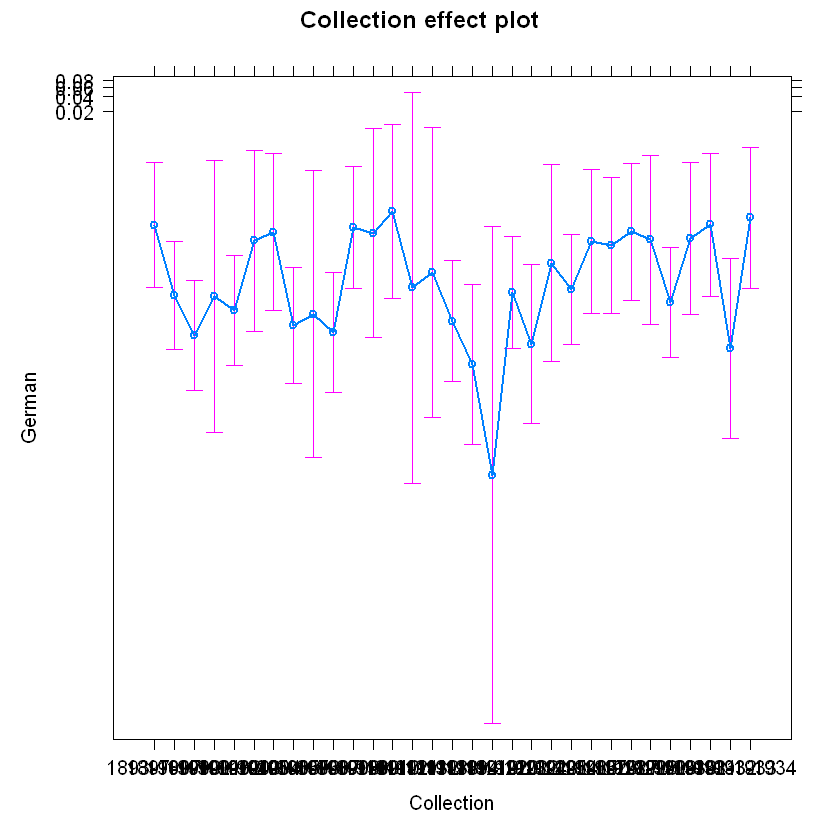

In [ ]:
#Model 6: add composer as random effect,

m6 <- glmer(German ~ Collection + (1|Composer), data = df, family = binomial())

plot(effect("Collection", m6))

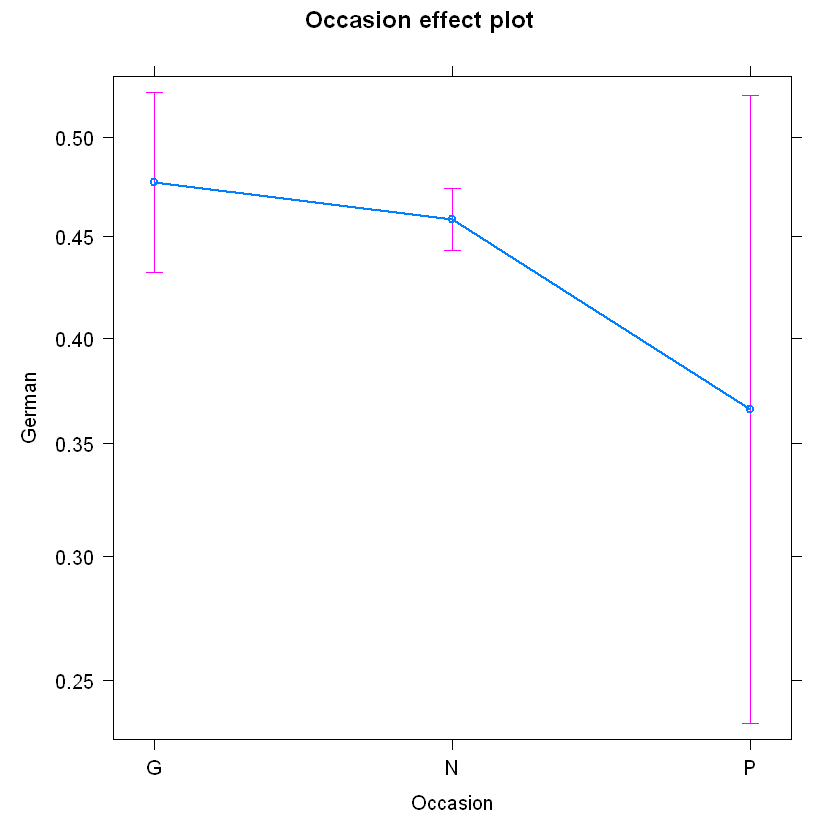

In [ ]:
#Model 7: the effect of the special occasion ant the probability of it being a German performance

G7 <- glm(German ~ Occasion, data = df, family = binomial)
plot(effect("Occasion", G1))

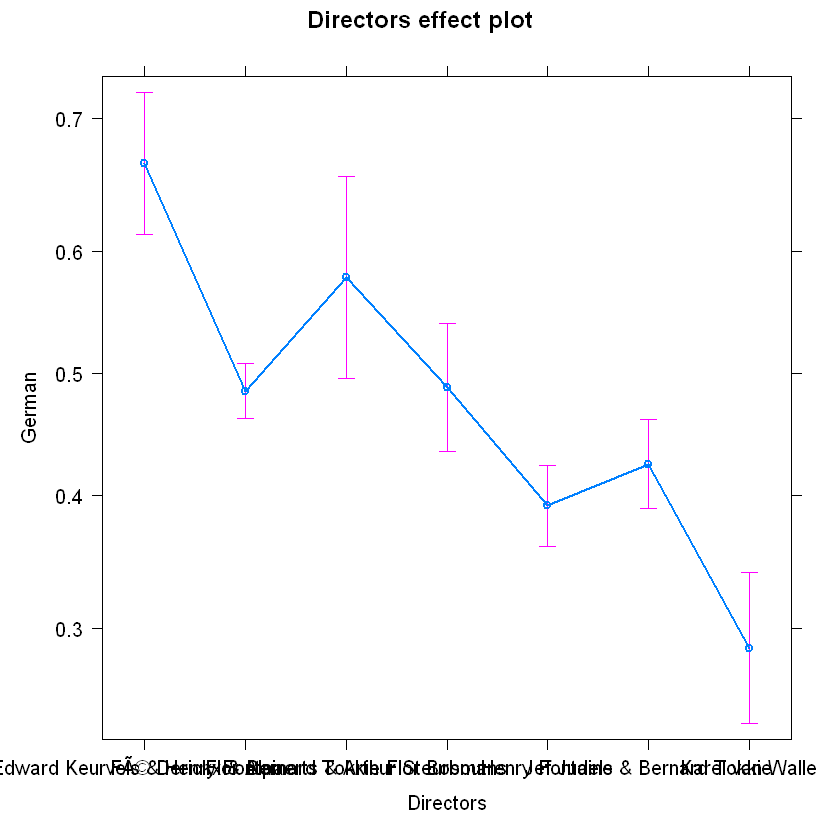

In [ ]:
#Model 7: the effect of the Director(s) and the probability of producing a German performances

G_Directors <- glm(German ~ Directors, data = df, family = binomial)
plot(effect("Directors", G_Directors))


## What happens when we delete Wagner from the dataset?

In [ ]:
#remove all rows that contain Wagner in the 'Composer column'
df2 <- df[!grepl("Wagner", df$Composer), ]
print(nrow(df))
print(nrow(df2))

[1] 4470
[1] 3770


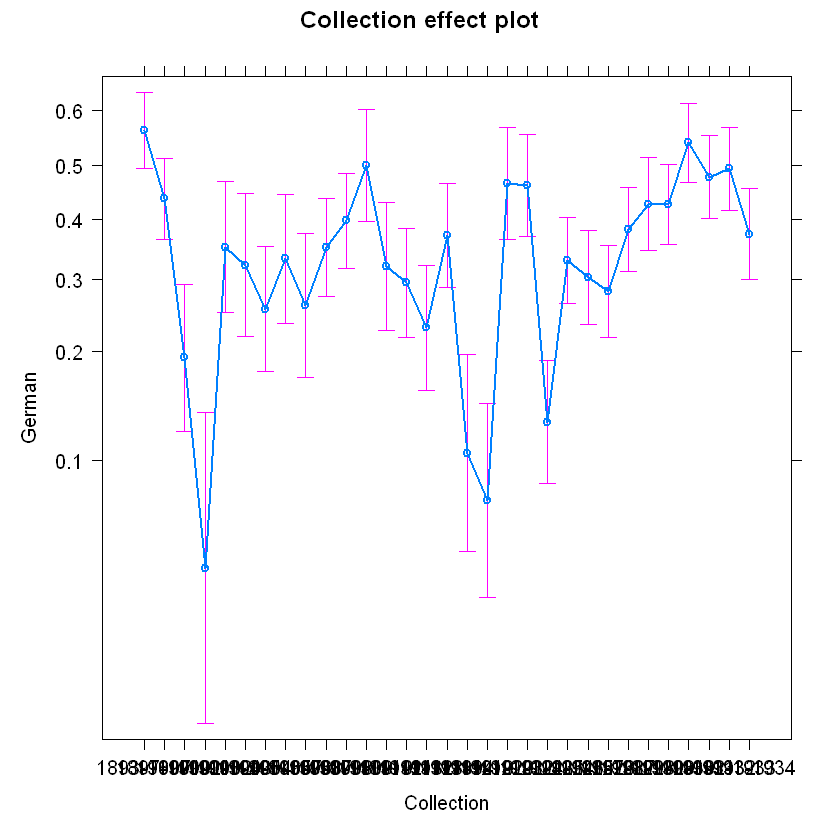

In [ ]:
m1_german <- glm(German ~ Collection, data = df2, family = binomial)

plot(effect("Collection", m1_german))


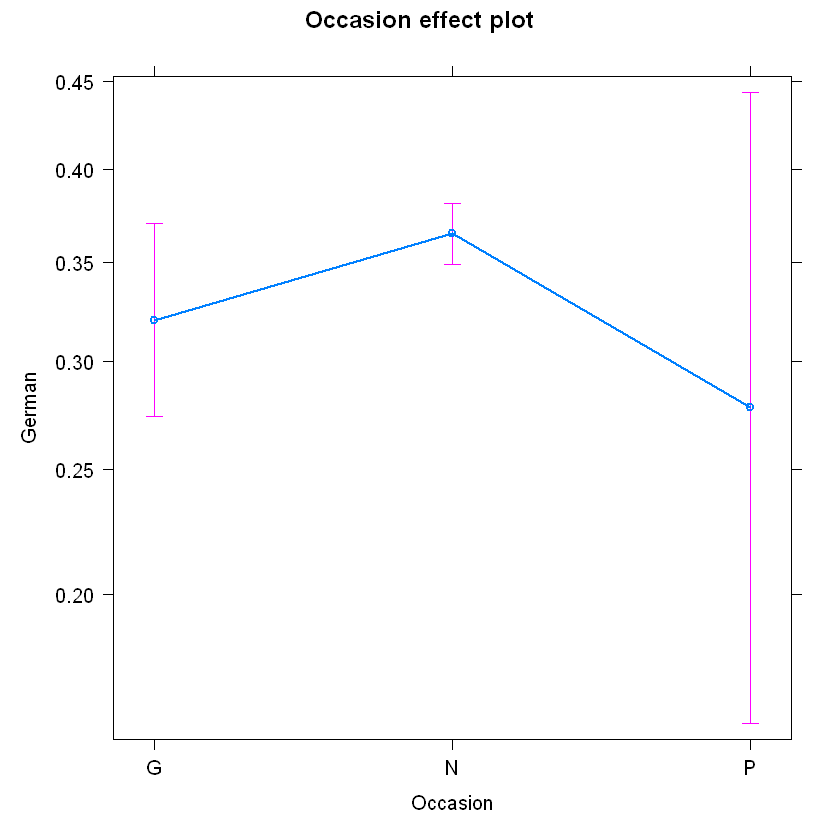

In [ ]:
#The German preference for Gala-performances seems to dissapear when taking Wagner out of the equation.
G_occ_nowag <- glm(German ~ Occasion, data = df2, family = binomial)
plot(effect("Occasion", G_occ_nowag))

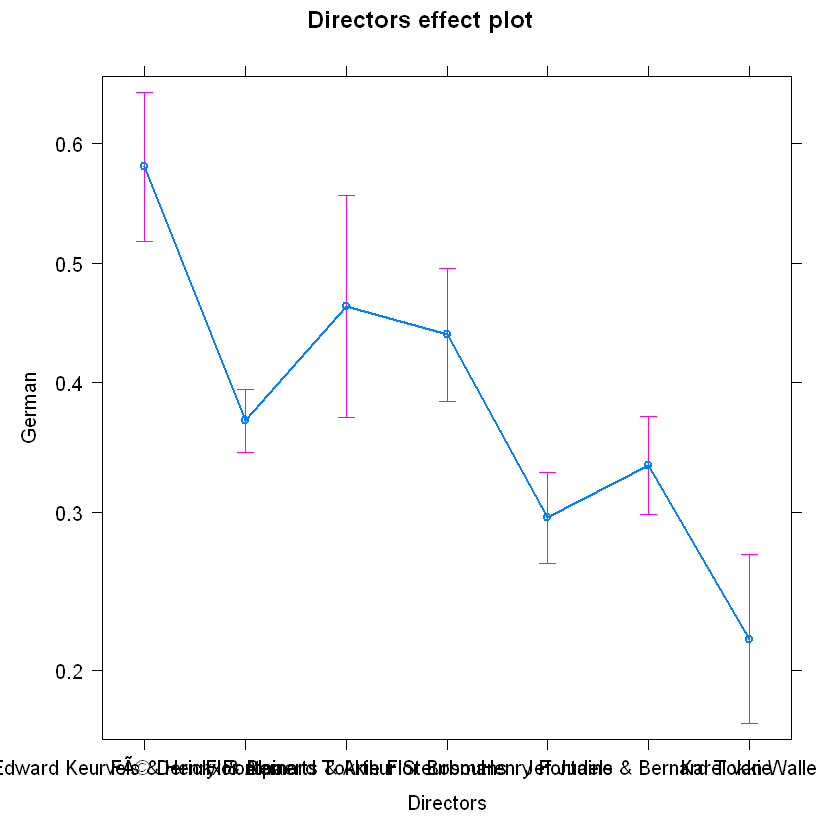

In [ ]:
G_Directors_nowag <- glm(German ~ Directors, data = df2, family = binomial)
plot(effect("Directors", G_Directors_nowag))